<a href="https://colab.research.google.com/github/vivekslair/experimentations/blob/main/GL_GrandHackathon_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers 
from tensorflow.keras.layers.experimental import preprocessing
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import normalize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/GLHackathonFiles')

In [ ]:
zf = zipfile.ZipFile('Train Data.zip') 
freq_domain_df = pd.read_csv(zf.open('Train Data Zip/frequency_domain_features_train.csv'))

In [ ]:
heart_rt_df = pd.read_csv(zf.open('Train Data Zip/heart_rate_non_linear_features_train.csv'))

In [ ]:
time_domain_df = pd.read_csv(zf.open('Train Data Zip/time_domain_features_train.csv'))

In [ ]:
freq_domain_df.shape

(369289, 12)

In [ ]:
heart_rt_df.shape

(369289, 7)

In [ ]:
time_domain_df.shape

(369289, 20)

In [ ]:
freq_domain_df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [ ]:
heart_rt_df.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [ ]:
time_domain_df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [ ]:
train_df = freq_domain_df.merge(heart_rt_df,on='uuid').merge(time_domain_df,on='uuid')

In [ ]:
train_df.shape

(369289, 37)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

In [ ]:
train_df.isna().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [ ]:
train_df.condition.value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

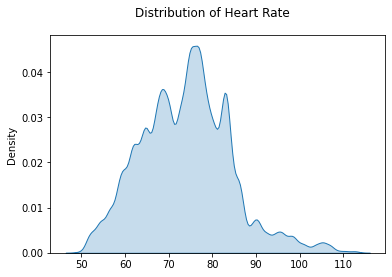

In [ ]:
p = sns.kdeplot((train_df['HR'].values), shade=True)
t = plt.suptitle("Distribution of Heart Rate")

Text(0.5, 1.0, 'Relation between heart rate and condition')

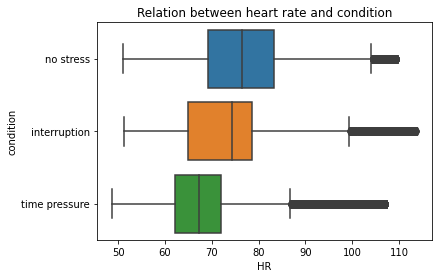

In [ ]:
sns.boxplot(x='HR',y='condition',data=train_df)
plt.title("Relation between heart rate and condition")

In [ ]:
train_df.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.0,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,3.692890e+05,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,2199.580170,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506,10.593708,154.178997,2.062471,1.182292,2.0,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,0.523235,0.041628,-1.756587e-06,-0.000465,0.018571,0.009701,0.009701,2.006817,0.523235,0.041628
std,1815.773422,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238,2.914795,109.170222,0.206999,0.062192,0.0,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,1.790348,0.699522,1.630256e-04,0.000868,0.005455,0.003897,0.003897,0.375845,1.790348,0.699522
min,159.480176,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,3.911344,38.307745,0.434576,1.033984,2.0,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894820,-2.136278,-1.233914e-03,-0.004425,0.008987,0.003220,0.003220,1.169342,-1.894820,-2.136278
25%,1001.189280,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433,8.368340,90.326864,2.032977,1.139929,2.0,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,-0.352783,-0.359291,-7.281695e-05,-0.000917,0.014261,0.006984,0.006984,1.749801,-0.352783,-0.359291
50%,1667.903111,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735,10.196621,116.221063,2.134214,1.174293,2.0,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,0.040736,-0.060966,-9.330777e-07,-0.000312,0.017318,0.008691,0.008691,1.934416,0.040736,-0.060966
75%,2654.121052,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854,12.679005,166.764850,2.181929,1.223621,2.0,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,0.722833,0.282417,6.911667e-05,0.000131,0.021827,0.011460,0.011460,2.221232,0.722833,0.282417
max,12617.977191,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043,18.836107,796.852945,2.234841,1.361219,2.0,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,6.777800,1.244098e-03,0.002095,0.036571,0.026955,0.026955,3.724134,64.088107,6.777800


In [ ]:
train_df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [ ]:
train_df = train_df[['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR','HR']]

Converting condition to One hot encoded values

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(train_df[['condition']]).toarray())

In [ ]:
train_df = train_df.join(enc_df)

In [ ]:
train_df.columns

Index([             'uuid',               'VLF',           'VLF_PCT',
                      'LF',            'LF_PCT',             'LF_NU',
                      'HF',            'HF_PCT',             'HF_NU',
                      'TP',             'LF_HF',             'HF_LF',
                     'SD1',               'SD2',            'sampen',
                  'higuci',         'datasetId',         'condition',
                 'MEAN_RR',         'MEDIAN_RR',              'SDRR',
                   'RMSSD',              'SDSD',        'SDRR_RMSSD',
                   'pNN25',             'pNN50',              'KURT',
                    'SKEW',       'MEAN_REL_RR',     'MEDIAN_REL_RR',
             'SDRR_REL_RR',      'RMSSD_REL_RR',       'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR',       'KURT_REL_RR',       'SKEW_REL_RR',
                      'HR',                   0,                   1,
                         2],
      dtype='object')

In [ ]:
train_df = train_df[['uuid','VLF','VLF_PCT','LF','LF_PCT','LF_NU','HF','HF_PCT','HF_NU','TP','LF_HF','HF_LF','SD1','SD2','sampen','higuci','MEAN_RR','MEDIAN_RR','SDRR','RMSSD','SDSD','SDRR_RMSSD','pNN25','pNN50','KURT','SKEW','MEAN_REL_RR','MEDIAN_REL_RR','SDRR_REL_RR','RMSSD_REL_RR','SDSD_REL_RR','SDRR_RMSSD_REL_RR','KURT_REL_RR', 'SKEW_REL_RR',0,1,2,'HR']]

In [ ]:
train_df = train_df.rename(columns={0:'condition_0',1:'condition_1',2:'condition_2'})

#Checking for outliers and skew

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


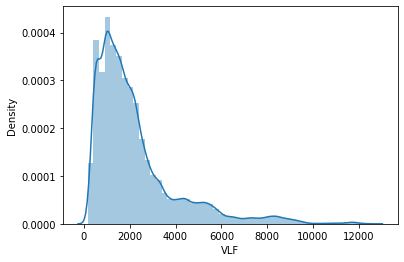

In [ ]:
sns.distplot(train_df['VLF'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


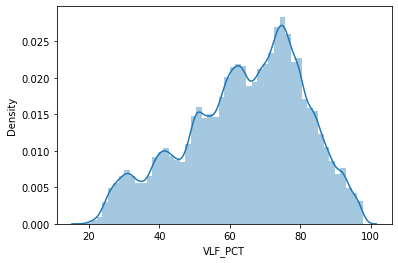

In [ ]:
sns.distplot(train_df['VLF_PCT'])

Have to see if VLF_PCT can be binned

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


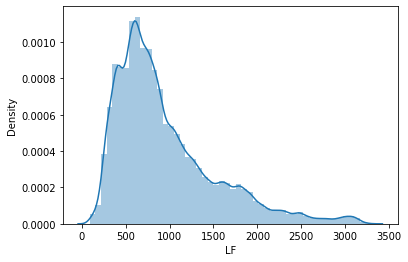

In [ ]:
sns.distplot(train_df['LF'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


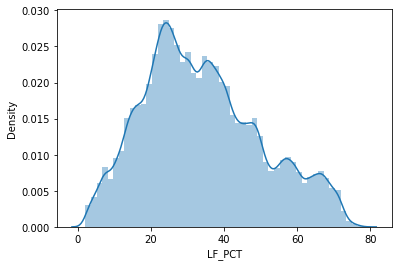

In [ ]:
sns.distplot(train_df['LF_PCT'])

Potential column for binning

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


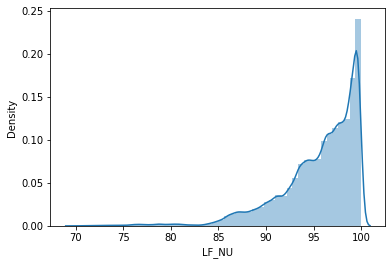

In [ ]:
sns.distplot(train_df['LF_NU'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


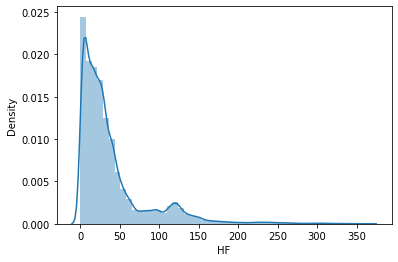

In [ ]:
sns.distplot(train_df['HF'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


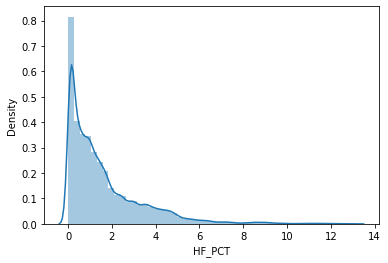

In [ ]:
sns.distplot(train_df['HF_PCT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


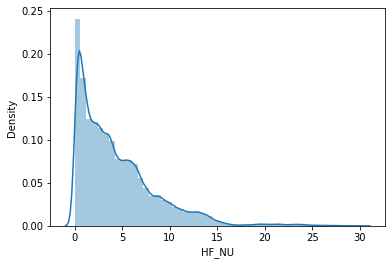

In [ ]:
sns.distplot(train_df['HF_NU'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


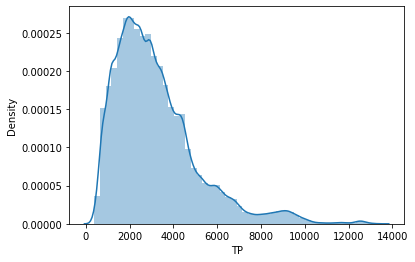

In [ ]:
sns.distplot(train_df['TP'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


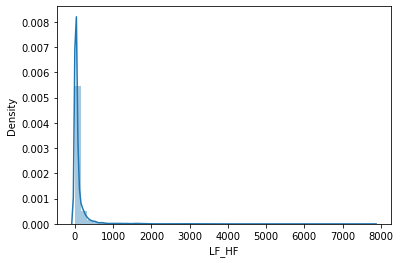

In [ ]:
sns.distplot(train_df['LF_HF'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


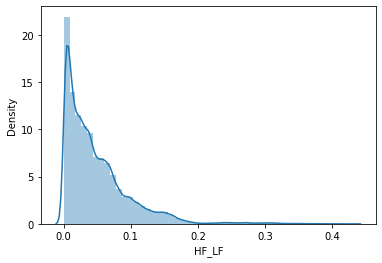

In [ ]:
sns.distplot(train_df['HF_LF'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


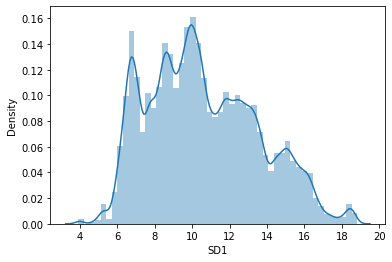

In [ ]:
sns.distplot(train_df['SD1'])

Column for binning

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


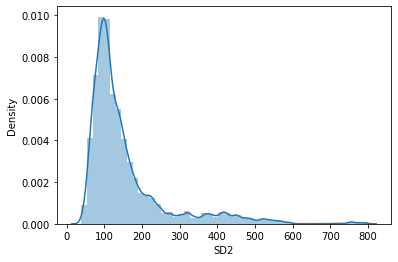

In [ ]:
sns.distplot(train_df['SD2'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


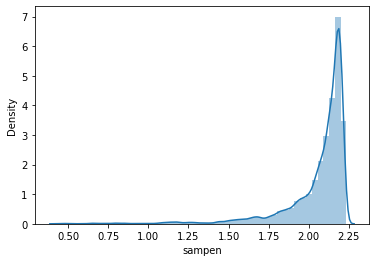

In [ ]:
sns.distplot(train_df['sampen'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


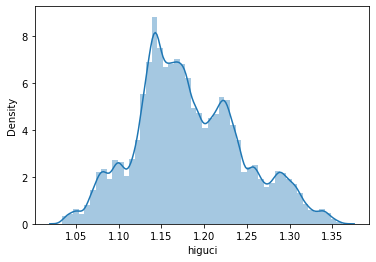

In [ ]:
sns.distplot(train_df['higuci'])

Binning to be done on this column

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


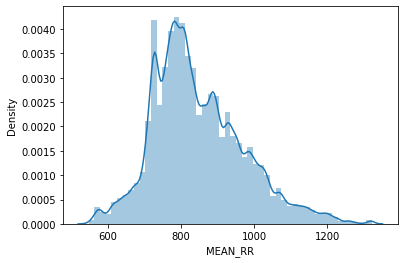

In [ ]:
sns.distplot(train_df['MEAN_RR'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


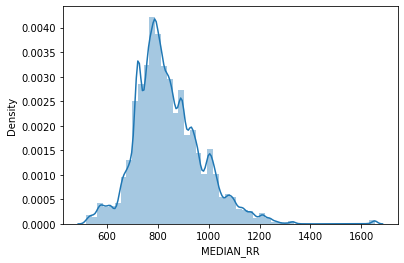

In [ ]:
sns.distplot(train_df['MEDIAN_RR'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


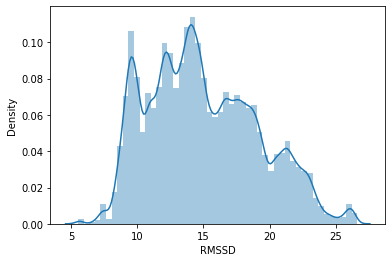

In [ ]:
sns.distplot(train_df['RMSSD'])

The column to be binned

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


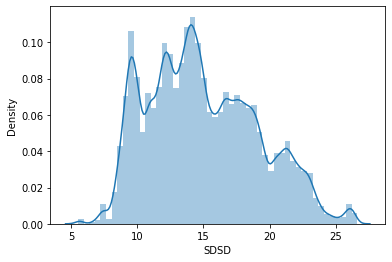

In [ ]:
sns.distplot(train_df['SDSD'])

Column for binning

In [ ]:
sns.distplot(train_df['SDRR_RMSSD'])

In [ ]:
sns.distplot(train_df['pNN25'])

In [ ]:
sns.distplot(train_df['pNN50'])

In [ ]:
sns.distplot(train_df['KURT'])

In [ ]:
sns.distplot(train_df['SKEW'])

In [ ]:
sns.distplot(train_df['MEAN_REL_RR'])

In [ ]:
sns.distplot(train_df['MEDIAN_REL_RR'])

In [ ]:
sns.distplot(train_df['SDRR_REL_RR'])

In [ ]:
sns.distplot(train_df['RMSSD_REL_RR'])

In [ ]:
sns.distplot(train_df['SDSD_REL_RR'])

In [ ]:
sns.distplot(train_df['SDRR_RMSSD_REL_RR'])

In [ ]:
sns.distplot(train_df['KURT_REL_RR'])

In [ ]:
sns.distplot(train_df['SKEW_REL_RR'])

#Bi-Variate Analysis of each of the columns with Heart rate

In [ ]:
train_df.columns

In [ ]:
sns.scatterplot(x='HR',y='VLF',data=train_df)

In [ ]:
sns.scatterplot(y='VLF_PCT',x='HR',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='LF',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='LF_PCT',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='LF_NU',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='HF',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='HF_PCT',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='TP',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='LF_HF',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='HF_LF',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='SD1',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='SD2',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='sampen',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='higuci',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='MEAN_RR',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='MEDIAN_RR',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='SDRR',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='RMSSD',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='SDSD',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='SDRR_RMSSD',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='pNN25',data=train_df)

In [ ]:
sns.scatterplot(x='HR',y='pNN50',data=train_df)

Scaling the data to see if that improves the distribution at variable level

In [ ]:
X=train_df.iloc[:,1:]

In [ ]:
#scaledX = pd.DataFrame(sc.fit_transform(X))

In [ ]:
#scaledX.columns=['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
      # 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       # 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       #'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       #'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       #'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR','condition_0','condition_1','condition_2','HR']

In [ ]:
#scaledX.head(10)

In [ ]:
#sns.distplot(scaledX['VLF'])

Applying log norm

In [ ]:
train_df['log_VLF'] = np.log(train_df['VLF'])

In [ ]:
sns.distplot(train_df['log_VLF'])

It is clear that the log norm is improving the variation dispersion more than scaling. Hence we will adopt log normal for all variables

In [ ]:
sc=StandardScaler()

In [ ]:
X=train_df.iloc[:,1:-1]
y=train_df['HR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((276966, 36), (92323, 36))

In [ ]:
#scaled_Xtrain = sc.fit_transform(X_train)

In [ ]:
#scaled_Xtest = sc.transform(X_test)

In [ ]:
train_df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'condition_0', 'condition_1', 'condition_2', 'HR'],
      dtype='object')

#Applying log norm and exponential to normalize the independent variables

In [ ]:
train = train_df.copy()

In [ ]:
#train_df = train.copy()

In [ ]:
#train_df['pNN25']

In [ ]:
#train_df['pNN25'] = train_df['pNN25'].apply(lambda x : 0.01 if x ==0.0 else x) # incrementing 0 values to avoid issues with log transformation

In [ ]:
def conv_log(col) :
  train_df[col] = train_df[col].apply(lambda x : 0.01 if x==0.0 else x)
  log_col = 'log_' + col
  train_df[log_col] = np.log(train_df[col])

In [ ]:
colsForConv = ['VLF','LF','HF','HF_PCT','HF_NU','TP','LF_HF','HF_LF','SD2','MEAN_RR','MEDIAN_RR','SDRR_RMSSD','pNN25','pNN50','SDRR_REL_RR',\
               'RMSSD_REL_RR','SDSD_REL_RR']

In [ ]:
#for col in colsForConv :
 # conv_log(col)

In [ ]:
#train_df['exp_LF_NU'] = np.exp(train_df['LF_NU'])

In [ ]:
#train_df['exp_sampen'] = np.exp(train_df['sampen'])

#Visualizing the log columns 

In [ ]:
def logColVis(col) :
  colName = 'log_' + col
  sns.distplot(train_df[colName])
  plt.show()

In [ ]:
#for col in colsForConv :
 # logColVis(col)

#Dropping columns which have been normalized with log and exponential transformations

In [ ]:
#train_df = train_df.drop(columns=colsForConv,axis=1)

In [ ]:
#def dropLogCols(col,train_df) :
  #log_name = 'log_'+col
  #train_df.drop(columns=log_name,axis=1,inplace=True)

In [ ]:
#for col in colsForConv:
  #dropLogCols(col,train_df)

In [ ]:
train_df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'condition_0', 'condition_1', 'condition_2', 'HR'],
      dtype='object')

In [ ]:
#train_df = train_df.drop(columns=['exp_LF_NU','exp_sampen'])

In [ ]:
#train_df = train_df[['SDRR_RMSSD_REL_RR','log_HF','log_HF_PCT','log_HF_NU','log_LF_HF','log_MEAN_RR','exp_LF_NU','HR']]

#Additional feature transformations

In [ ]:
train_df['LF_PCT'] = train_df['LF_PCT'].apply(lambda x : 0 if x <= 30 else 1 if x >30 and x <=60 else 2)

In [ ]:
(train_df['SD1']) = (train_df['SD1']).apply(lambda x : 0 if x <=7 else 1 if x>7 and x <=9 else 2 if x>11 and x <=14 else 3  )

In [ ]:
train_df['higuci'] = train_df['higuci'].apply(lambda x : 0 if x<=1.15 else 1 if x > 1.15 and x <= 1.2 else 2 if x > 1.2 and x <=1.25 else 3)

In [ ]:
train_df['RMSSD'] = train_df['RMSSD'].apply(lambda x : 0 if x <=10 else 1 if x >10 and x <=16 else 2 if x > 16 and x <=20 else 3)

In [ ]:
train_df['SDSD'] = train_df['SDSD'].apply(lambda x : 0 if x <=10 else 1 if x > 10 and x <= 14 else 2 if x >14 and x <=16 else 3 if x >16 and x<=20 else 4)

In [ ]:
X=train_df.drop(columns=['HR','uuid'],axis=1)
y=train_df['HR']

In [ ]:
X_crossval = train_df.drop(columns=['uuid','HR'],axis=1)
y_crossval = train_df['HR']

In [ ]:
#X = X[['MEDIAN_RR','HF_PCT']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((276966, 36), (92323, 36))

In [ ]:
X_train.shape

(276966, 36)

#Building the LinearRegression Model - no hyperparameter tuning

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
linear_model.score(X_test,y_test)

0.9792162603657109

In [ ]:
linear_model.score(X_train,y_train)

0.979197478242045

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
mse

2.251840872213138

In [ ]:
mae = mean_absolute_error(y_test,y_pred)

In [ ]:
mae

1.005389622152178

#Log and exponential of the columns didnt improve the model performance infact it led to degradation. Hence trying SVR or other algorithms

#Random Forest Regression

In [ ]:
regressor = RandomForestRegressor(n_estimators=1000,random_state=0,max_depth=50)
regressor.fit(X_train,y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test,y_pred)

In [ ]:
mae

In [ ]:
regressor.feature_importances_

In [ ]:
train_df_cols = pd.DataFrame(X.columns)

In [ ]:
train_df_cols['weights'] = regressor.feature_importances_

In [ ]:
train_df_cols.rename(columns={0:'column_nm'},inplace=True)

In [ ]:
train_df_cols.sort_values(by='weights',ascending=False,inplace=True)

In [ ]:
plot_data = train_df_cols.iloc[0:5,:]

In [ ]:
sns.barplot(y=plot_data['column_nm'],x=plot_data['weights'])

In [ ]:
param_grid = {
                 'n_estimators': [300],
                 'max_depth': [30]
             }

In [ ]:
regressor = RandomForestRegressor(random_state=0)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
grid_clf = GridSearchCV(regressor, param_grid,scoring='neg_mean_absolute_error', cv=cv,verbose=10)
grid_clf.fit(X_crossval, y_crossval)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=30, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=30, n_estimators=300, score=-0.007, total=65.1min
[CV] max_depth=30, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 65.1min remaining:    0.0s


[CV] ..... max_depth=30, n_estimators=300, score=-0.007, total=67.6min
[CV] max_depth=30, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 132.7min remaining:    0.0s


[CV] ..... max_depth=30, n_estimators=300, score=-0.006, total=68.1min
[CV] max_depth=30, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 200.9min remaining:    0.0s


[CV] ..... max_depth=30, n_estimators=300, score=-0.006, total=66.4min
[CV] max_depth=30, n_estimators=300 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 267.4min remaining:    0.0s


[CV] ..... max_depth=30, n_estimators=300, score=-0.006, total=65.1min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 332.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 332.5min finished


In [ ]:
grid_clf.cv_results_

{'mean_fit_time': array([3971.34448986]),
 'mean_score_time': array([16.44476829]),
 'mean_test_score': array([-0.00651976]),
 'param_max_depth': masked_array(data=[30],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 30, 'n_estimators': 300}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([-0.00671318]),
 'split1_test_score': array([-0.00674439]),
 'split2_test_score': array([-0.00646128]),
 'split3_test_score': array([-0.00634873]),
 'split4_test_score': array([-0.00633124]),
 'std_fit_time': array([74.20913583]),
 'std_score_time': array([1.25976964]),
 'std_test_score': array([0.00017668])}

In [ ]:
grid_clf. best_estimator_ 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
os.chdir('/content/drive/My Drive')

In [ ]:
filename = 'RFregressor.sav'

In [ ]:
pickle.dump(grid_clf. best_estimator_, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

#Neural Network

In [ ]:
x_train = normalize(X_train, axis = 1)

In [ ]:
x_test = normalize(X_test,axis=1)

In [ ]:
filepath = "model2.h5"
cp1= ModelCheckpoint(filepath=filepath, monitor='loss',     save_best_only=True, verbose=1, mode='min')
callbacks_list = [cp1]

In [ ]:
#Model 
tf.keras.backend.clear_session()
tf.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(1024, input_dim = X_train.shape[1]), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),
    
    keras.layers.Dense(512),  
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),
    
    keras.layers.Dense(units=512), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),

    keras.layers.Dense(units=512), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),

    keras.layers.Dense(units=512), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),

    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.3),
     
    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),

    keras.layers.Dense(units=256), 
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),

    keras.layers.Dense(units=128),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2), 

    keras.layers.Dense(units=128),
    keras.layers.LeakyReLU(),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=1, activation="linear"),
],name="LeakyRELU",)
model.summary()

Model: "LeakyRELU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              37888     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               26

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss='mean_absolute_error')

NameError: ignored

In [ ]:
%%time
history = model.fit(
    x_train, y_train,
    epochs=200,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,callbacks=callbacks_list)

NameError: ignored

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test,y_pred)

In [ ]:
mae

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

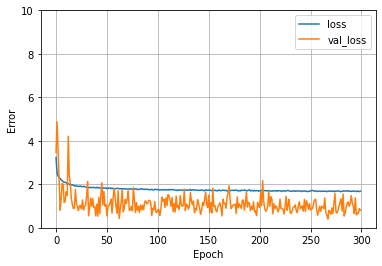

In [ ]:
plot_loss(history)

#Final prediction pipeline

In [ ]:
os.chdir('/content/drive/My Drive/GLHackathonFiles')

In [ ]:
zf = zipfile.ZipFile('Test Data.zip')

In [ ]:
test_freq = pd.read_csv(zf.open('Test Zip/frequency_domain_features_test.csv'))

In [ ]:
test_heart_rate = pd.read_csv(zf.open('Test Zip/heart_rate_non_linear_features_test.csv'))

In [ ]:
test_time_domain = pd.read_csv(zf.open('Test Zip/time_domain_features_test.csv'))

In [ ]:
test_df = test_freq.merge(test_heart_rate,on='uuid').merge(test_time_domain,on='uuid')

In [ ]:
test_enc_df = pd.DataFrame(enc.transform(test_df[['condition']]).toarray())

In [ ]:
test_df = test_df.join(test_enc_df)

In [ ]:
test_df = test_df.rename(columns={0:'condition_0',1:'condition_1',2:'condition_2'})

In [ ]:
test_df.columns

In [ ]:
test_df.drop(columns=['uuid','condition','datasetId'],axis=1,inplace=True)

In [ ]:
test_df.shape

In [ ]:
test_df.columns

In [ ]:
X_train.columns

In [ ]:
test_pred = regressor.predict(test_df)

In [ ]:
prediction_data = test_freq.merge(test_heart_rate,on='uuid').merge(test_time_domain,on='uuid')
#prediction_data = prediction_data['uuid']

In [ ]:
prediction_data['HR'] = test_pred

In [ ]:
prediction_data.head()

In [ ]:
final_df = prediction_data[['uuid','HR']]

In [ ]:
os.chdir('/content/drive/My Drive')

In [ ]:
final_df.to_csv('final_prediction.csv')